In [1]:
import sys, os
import cv2
from tqdm import tqdm
import model3_hs



In [4]:
ok_dir = "../image/module/overkill/"
file_names = os.listdir(ok_dir)

sensor_ratios = []
bump_ratios = []
preds = {"OK": 0, "NG": 0}
for name in tqdm(file_names):
    img_ok = cv2.imread(ok_dir + name)

    pred, debug_imgs, sensor_ratio, bump_ratio = model3_hs.model_hs(img_ok, show=False, bright=5, test = True)
    preds[pred] += 1
    sensor_ratios.append(sensor_ratio)
    bump_ratios.append(bump_ratio)


100%|██████████| 500/500 [03:17<00:00,  2.53it/s]


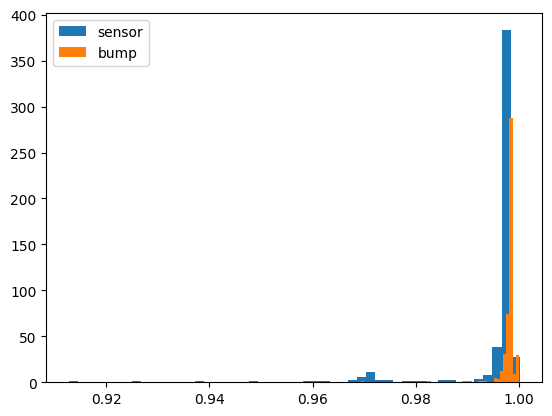

In [5]:
import matplotlib.pyplot as plt
import numpy as np
sensor_ratios_dropna = [rat for rat in sensor_ratios if rat is not None]
bump_ratios_dropna = [rat for rat in bump_ratios if rat is not None]
plt.hist(sensor_ratios_dropna,bins = 50,label='sensor')
plt.hist(bump_ratios_dropna,bins = 50,label='bump')
plt.legend()
plt.show()